### Derived lost bog dataset

Data to show areas which were peat bog in 2000 but not in 2012

geojson files prepared using peat_bog_geojson_corine.ipynb notebook

In [1]:
# dataset showing lost peat bogs between 2000 and 2012
import geopandas as gpd
import json

In [2]:
gdf_2000 = gpd.read_file("ireland_peat_bogs_2000.geojson", driver="GeoJSON")
gdf_2012 = gpd.read_file("ireland_peat_bogs_2012.geojson", driver="GeoJSON")

In [3]:
gdf_2000.head(5)

,id,code_00,ID,Remark,Area_Ha,geometry
0,3586,412,EU-2107747,NaN,115.639285,"POLYGON ((-7.76568 55.06414, -7.76705 55.06434..."
1,3589,412,EU-2107750,NaN,73.155026,"POLYGON ((-7.63789 55.08925, -7.63676 55.08942..."
2,3592,412,EU-2107753,NaN,25.353560,"POLYGON ((-8.41626 54.97245, -8.41606 54.97214..."
3,3599,412,EU-2107760,NaN,435.744193,"POLYGON ((-7.77176 55.07772, -7.77152 55.07750..."
4,3597,412,EU-2107758,NaN,88.635444,"POLYGON ((-8.40446 54.98920, -8.40333 54.98917..."


In [4]:
gdf_2012.head(5)

,id,Code_12,Remark,Area_Ha,ID,geometry
0,1555998,412,NaN,108.029751,EU-1555999,"POLYGON ((-8.00943 55.20788, -8.00933 55.20788..."
1,1555750,412,NaN,26.277025,EU-1555751,"POLYGON ((-10.07569 54.12496, -10.07568 54.125..."
2,1555766,412,NaN,280.320072,EU-1555767,"POLYGON ((-9.76352 54.19814, -9.76347 54.19812..."
3,1555761,412,NaN,44.729570,EU-1555762,"POLYGON ((-9.91949 54.16363, -9.91936 54.16357..."
4,1555780,412,NaN,51.831378,EU-1555781,"POLYGON ((-9.63597 54.23095, -9.63609 54.23090..."


In [5]:
lost = gpd.overlay(gdf_2000, gdf_2012, how="difference")
lost.head(5)

,id,code_00,ID,Remark,Area_Ha,geometry
0,3586,412,EU-2107747,NaN,115.639285,"MULTIPOLYGON (((-7.77073 55.05922, -7.77119 55..."
1,3589,412,EU-2107750,NaN,73.155026,"POLYGON ((-7.63789 55.08925, -7.63676 55.08942..."
2,3592,412,EU-2107753,NaN,25.353560,"POLYGON ((-8.41626 54.97245, -8.41606 54.97214..."
3,3599,412,EU-2107760,NaN,435.744193,"MULTIPOLYGON (((-7.72419 55.08116, -7.72418 55..."
4,3597,412,EU-2107758,NaN,88.635444,"MULTIPOLYGON (((-8.41152 54.98103, -8.41244 54..."


<Axes: >

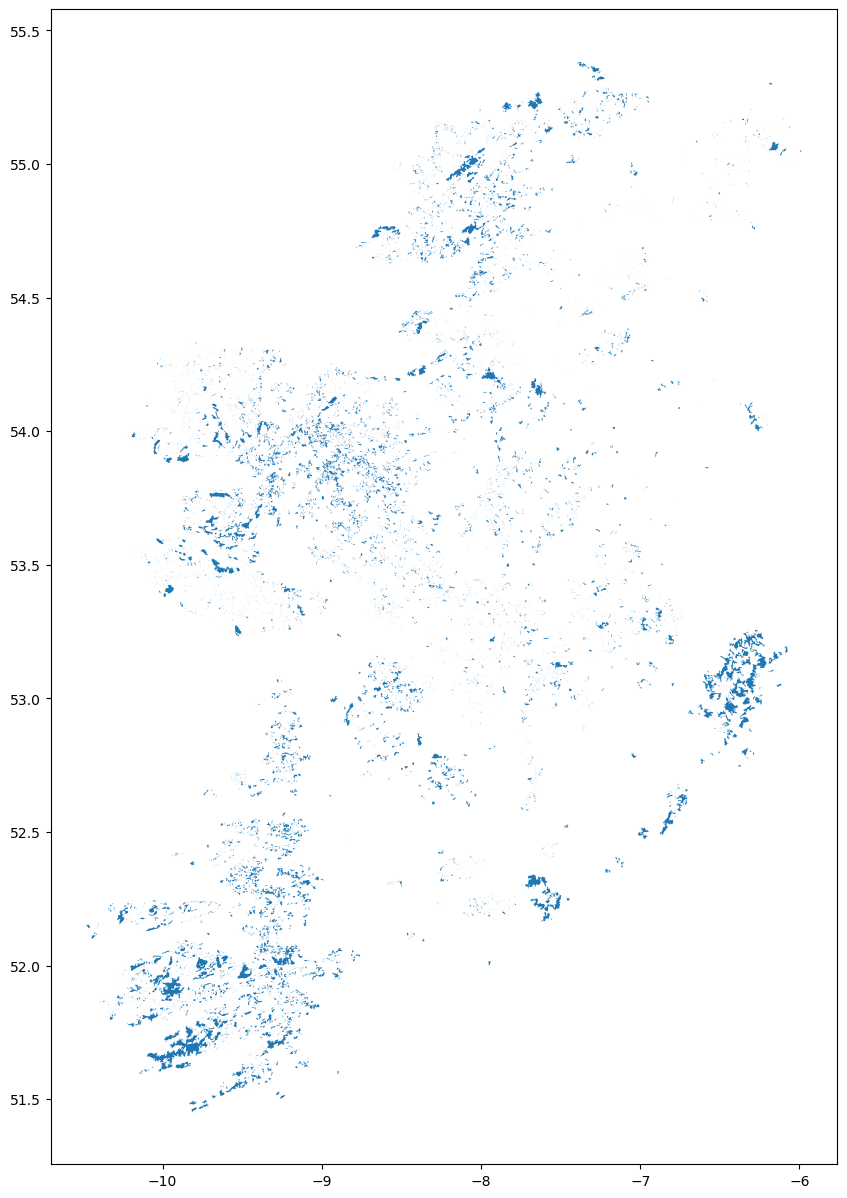

In [6]:
lost['geometry'] = lost.simplify(tolerance=0.0003)
lost.plot(figsize=(15,15))

In [7]:
with open("peat_bog_loss.geojson", "w") as file:
    data = lost.to_json(to_wgs84=True)
    json.dump(json.loads(data), file)